In [129]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt

In [66]:
df = pd.read_json('Data/quotes-2019-nytimes.json',lines=True)
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E


In [67]:
#def process_chunk(chunk):
#        print(f'Processing chunk with {len(chunk)} rows')
#        print(chunk.columns)

#i = 0
#with pd.read_json('Data/quotes-2019-nytimes.json', lines = True, chunksize=10) as df:
#    for chunk in df:
#        i = i+1
#        process_chunk(chunk)
#        if i == 5:
#            break

## Data description

In [68]:
df.describe()

,numOccurrences
count,207527.000000
mean,7.698844
std,55.648115
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,12095.000000


In [69]:
df.dtypes

quoteID                   object
quotation                 object
speaker                   object
qids                      object
date              datetime64[ns]
numOccurrences             int64
probas                    object
urls                      object
phase                     object
dtype: object

## Missing values

In [70]:
df.isnull().any()

quoteID           False
quotation         False
speaker           False
qids              False
date              False
numOccurrences    False
probas            False
urls              False
phase             False
dtype: bool

In [71]:
df[df.quotation == '']

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase


In [104]:
#todo removing 'None' speaker, not useful for our analysis between genders.
df_2 = df.drop(df[df.speaker == 'None'].index)
df_2

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E
5,2019-08-15-002017,A Senator we can call our own.,Tom Rath,[Q7817334],2019-08-15 22:36:33,1,"[[Tom Rath, 0.7598], [None, 0.1993], [Warren R...",[http://www.nytimes.com/2019/08/15/us/politics...,E
8,2019-07-22-032883,"It's a success, a relief and a technical feat,",Florence Parly,[Q3074013],2019-07-22 02:37:50,21,"[[Florence Parly, 0.9262], [None, 0.0738]]",[http://www.breitbart.com/news/french-submarin...,E
...,...,...,...,...,...,...,...,...,...
207519,2019-07-26-022518,"I just said, `John, it really costs a lot of m...",Gary Hart,"[Q5525217, Q5525222, Q919448]",2019-07-26 09:00:11,3,"[[Gary Hart, 0.6591], [None, 0.2432], [John Hi...",[http://nytimes.com/2019/07/26/us/politics/joh...,E
207520,2019-02-27-038374,"I know what Mr. Trump is,",Michael Cohen,"[Q16728129, Q18038631, Q1930523, Q22277395, Q2...",2019-02-27 15:45:24,20,"[[Michael Cohen, 0.5513], [None, 0.3734], [Pre...",[https://www.seattletimes.com/opinion/nixonian...,E
207523,2019-06-25-032409,I used to go there religiously and buy anythin...,Carlos Santana,"[Q2367902, Q5042623, Q819016]",2019-06-25 19:52:47,2,"[[Carlos Santana, 0.9484], [None, 0.04], [Rick...",[https://www.nytimes.com/2019/06/25/arts/music...,E
207524,2019-05-02-043481,I was the welterweight boxing champ at St. Mik...,Leonard Patrick Kelly,[Q7143620],2019-05-02 21:41:51,3,"[[Leonard Patrick Kelly, 0.5743], [None, 0.388...",[http://nytimes.com/2019/05/02/obituaries/red-...,E


## Duplicates

In [105]:
duplicates = df_2[df_2.duplicated(subset='quoteID', keep='first')] 
duplicates.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase


## Columns justification

drop phase,

drop probas because we already took car of 'None' speaker

drop quids, because we have access to the aliases in speaker.json

remove time in date?

Quotation-centric data 
 |-- quoteID: Primary key of the quotation (format: "YYYY-MM-DD-{increasing int:06d}") 
 |-- quotation: Text of the longest encountered original form of the quotation 
 |-- date: Earliest occurrence date of any version of the quotation 
 |-- phase: Corresponding phase of the data in which the quotation first occurred (A-E) 
 |-- probas: Array representing the probabilities of each speaker having uttered the quotation. 
      The probabilities across different occurrences of the same quotation are summed for 
      each distinct candidate speaker and then normalized 
      |-- proba: Probability for a given speaker 
      |-- speaker: Most frequent surface form for a given speaker in the articles where the quotation occurred 
 |-- speaker: Selected most likely speaker. This matches the the first speaker entry in 
probas
 
 |-- qids: Wikidata IDs of all aliases that match the selected speaker 
 |-- numOccurrences: Number of time this quotation occurs in the articles 
 |-- urls: List of links to the original articles containing the quotation

In [106]:
df_2['date'] = df_2['date'].dt.date
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,"[Q16213953, Q20707104, Q43143598, Q58886302, Q...",2019-04-17 13:31:18,1,"[[James Fisher, 0.7475], [None, 0.2525]]",[https://www.nytimes.com/2019/04/17/realestate...,E
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,[Q105756],2019-04-02 14:58:33,2,"[[John Updike, 0.5856], [None, 0.4144]]",[https://www.nytimes.com/2019/04/02/opinion/vl...,E
2,2019-05-09-055187,It makes it much more difficult for him to mak...,None,[],2019-05-09 18:11:29,1,"[[None, 0.6493], [President Bill Clinton, 0.27...",[http://mobile.nytimes.com/2019/05/09/world/as...,E
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,[Q1855840],2019-10-31 16:45:15,3,"[[Xavier Becerra, 0.9065], [None, 0.0909], [St...",[http://www.nytimes.com/2019/10/31/technology/...,E
4,2019-01-04-001792,A Pile of Leaves.,None,[],2019-01-04 10:00:07,1,"[[None, 0.8737], [Jason Fulford, 0.1263]]",[https://www.nytimes.com/2019/01/04/books/revi...,E


In [107]:
df_2[df_2.phase != 'E']

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase


In [109]:
df_2 = df_2.drop(['phase','probas','qids'], axis=1)
df_2.head()

,quoteID,quotation,speaker,date,numOccurrences,urls
0,2019-04-17-024782,"It is not a low-income immigration,",James Fisher,2019-04-17,1,[https://www.nytimes.com/2019/04/17/realestate...
1,2019-04-02-001128,a champion figure skater switching to roller s...,John Updike,2019-04-02,2,[https://www.nytimes.com/2019/04/02/opinion/vl...
3,2019-10-31-056366,"It puts me in a predicament,",Xavier Becerra,2019-10-31,3,[http://www.nytimes.com/2019/10/31/technology/...
5,2019-08-15-002017,A Senator we can call our own.,Tom Rath,2019-08-15,1,[http://www.nytimes.com/2019/08/15/us/politics...
8,2019-07-22-032883,"It's a success, a relief and a technical feat,",Florence Parly,2019-07-22,21,[http://www.breitbart.com/news/french-submarin...


## Inconsistent Data 

to see, maybe we have done enough already

## Correlation

In [110]:
df_2.corr(method='pearson')

,numOccurrences
numOccurrences,1.0


TODO : Add correlations with new columns

Correlation of the genders, transform them as binary values

## Data visualization

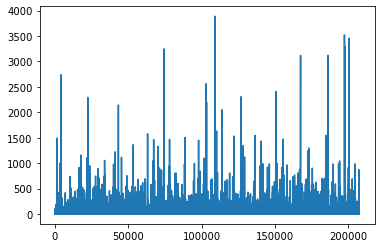

In [135]:
plt.plot(df_2['numOccurrences'])
plt.show()